<a href="https://colab.research.google.com/github/moeinghaeini/Audio-Pattern-Recognition/blob/main/Support_Vector_Machines_(SVMs)_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import drive

In [6]:
# === CONFIGURATION ===
DATA_PATH = "/content/drive/MyDrive/University of Milan/Audio Pattern Recognition/Data.json"

In [7]:
# === MOUNT DRIVE ===
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# === DATA LOADING ===
def load_data(data_path: str) -> tuple[np.ndarray, np.ndarray]:
    with open(data_path, "r") as fp:
        data = json.load(fp)
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y

In [9]:
# === DATA PREPARATION ===
def prepare_datasets_svm(test_size: float, validation_size: float) -> tuple:
    X, y = load_data(DATA_PATH)

    # Train/test/validation split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_size, random_state=42)

    # Reshape to 2D
    X_train = X_train.reshape(len(X_train), -1)
    X_val = X_val.reshape(len(X_val), -1)
    X_test = X_test.reshape(len(X_test), -1)

    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test, scaler

In [10]:
# === MODEL TRAINING ===
def build_and_train_svm(X_train: np.ndarray, y_train: np.ndarray) -> SVC:
    model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
    model.fit(X_train, y_train)
    return model

In [11]:
# === EVALUATION ===
def evaluate_svm(model: SVC, X_test: np.ndarray, y_test: np.ndarray):
    y_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix - SVM")
    plt.show()

    # Classification report
    print("Classification Report (SVM):")
    print(classification_report(y_test, y_pred, digits=4))

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy (SVM): {accuracy:.4f}")

In [12]:
# === PREDICTION ===
def predict_sample(model: SVC, sample: np.ndarray, true_label: int):
    prediction = model.predict(sample.reshape(1, -1))
    print(f"Target: {true_label}, Predicted: {prediction[0]}")


--- SVM ---


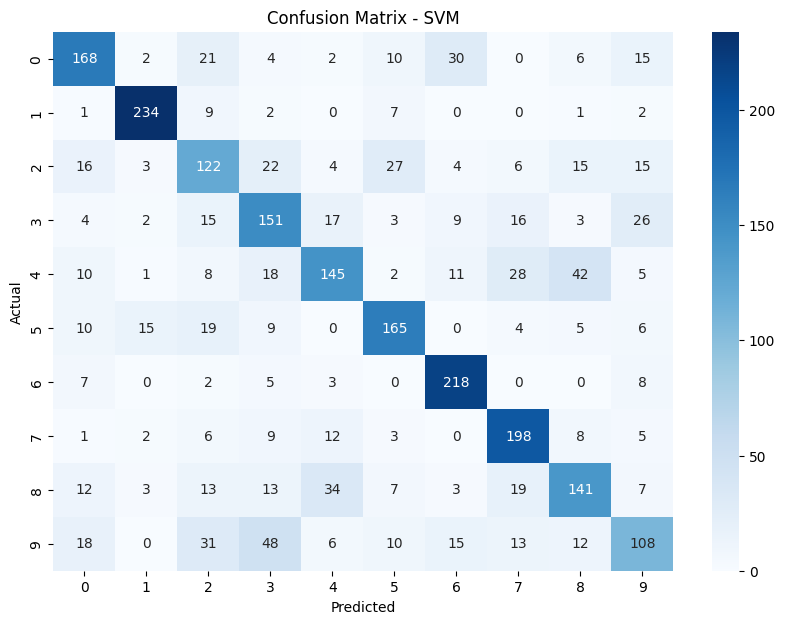

Classification Report (SVM):
              precision    recall  f1-score   support

           0     0.6802    0.6512    0.6653       258
           1     0.8931    0.9141    0.9035       256
           2     0.4959    0.5214    0.5083       234
           3     0.5374    0.6138    0.5731       246
           4     0.6502    0.5370    0.5882       270
           5     0.7051    0.7082    0.7066       233
           6     0.7517    0.8971    0.8180       243
           7     0.6972    0.8115    0.7500       244
           8     0.6052    0.5595    0.5814       252
           9     0.5482    0.4138    0.4716       261

    accuracy                         0.6608      2497
   macro avg     0.6564    0.6628    0.6566      2497
weighted avg     0.6570    0.6608    0.6559      2497


Accuracy (SVM): 0.6608
Target: 4, Predicted: 3


In [13]:
# === MAIN EXECUTION ===
if __name__ == "__main__":
    print("\n--- SVM ---")

    # Prepare data
    X_train, X_val, X_test, y_train, y_val, y_test, scaler = prepare_datasets_svm(test_size=0.25, validation_size=0.2)

    # Train model
    model = build_and_train_svm(X_train, y_train)

    # Evaluate model
    evaluate_svm(model, X_test, y_test)

    # Predict a sample
    sample_index = 100
    predict_sample(model, X_test[sample_index], y_test[sample_index])
